In [1]:
import kagglehub

fall_ml_2_mipt_2024_path = kagglehub.competition_download('fall-ml-2-mipt-2024')

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import QuantileRegressor

In [3]:
train = pd.read_csv(fall_ml_2_mipt_2024_path + "/train.csv")
target = pd.read_csv(fall_ml_2_mipt_2024_path + "/test.csv")

train = train.drop(columns=['x7', 'x13', 'x14', 'x9'])
target = target.drop(columns=['x7', 'x13', 'x14', 'x9'])

<Axes: >

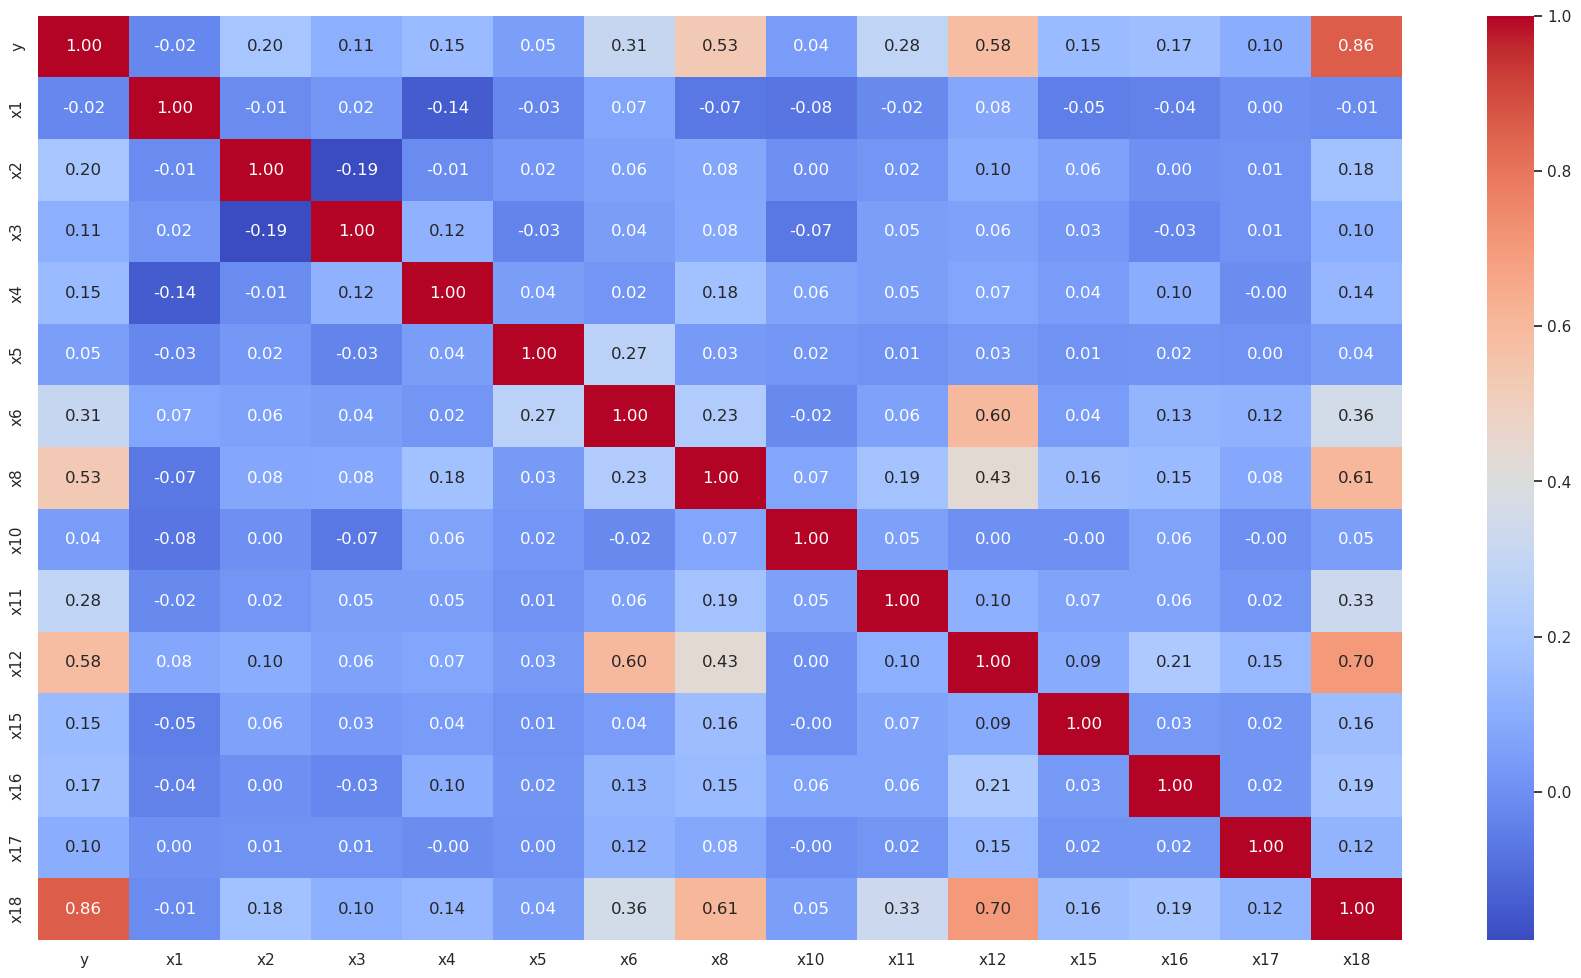

In [4]:
sns.set_theme(palette='Set2', rc={'figure.figsize': (22, 12)})
sns.heatmap(train.drop(columns=['index']).corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

In [5]:
X = train.drop(columns=['y', 'index'])
y = train['y']
target_ids = target['index']
X_target = target.drop(columns=['index'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
def mape_print(model_):
    y_test_pred = model_.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    print(f"MAPE Test: {mape}")


def mape_output(model_):
    y_target_pred = model_.predict(X_target)
    submission = pd.DataFrame({"index": target["index"], "y": y_target_pred})
    submission.to_csv("submission.csv", index=False)

In [7]:
model = QuantileRegressor(alpha=0, quantile=0.5)

model.fit(X_train, y_train, sample_weight=1 / y_train)
mape_print(model)
mape_output(model)

MAPE Test: 0.24169174988045186
